# Group Coursework 

## Preparing Dataset

**Import Library**


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn
import scipy as sp

import scipy.stats as sps

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

**Pulling Data**

According to the research question, some variables from original file are copied to CSV file.Various versions pf the data and variables were tested to finalise the model.

In [3]:
gcd = pd.read_csv('file.csv')

In [4]:
gcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 8 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   District                                                      117 non-null    int64  
 1   Ln_Crime Incidents                                            117 non-null    float64
 2   Urban share of population (% of population)                   117 non-null    float64
 3   Ln_Number of poor per 1000                                    117 non-null    float64
 4   Ln_Household members per room                                 117 non-null    float64
 5   Youth literacy, 15-24 years old (% of population aged 15-24)  117 non-null    float64
 6   Child labor (% of children aged 10-17)                        117 non-null    float64
 7   National poverty rank (N)                                     117 non-nu

In [5]:
gcd.head()

,District,Ln_Crime Incidents,Urban share of population (% of population),Ln_Number of poor per 1000,Ln_Household members per room,"Youth literacy, 15-24 years old (% of population aged 15-24)",Child labor (% of children aged 10-17),National poverty rank (N)
0,0,4.8300,6.0900,3.3700,1.1600,28.5600,18.3300,57
1,1,6.9500,14.0700,4.9800,1.4900,31.7300,43.4200,113
2,2,4.6800,26.3800,3.9700,1.1600,73.9000,16.3400,93
3,3,6.1800,5.2300,5.1800,1.1100,68.2700,26.6300,73
4,4,6.9500,78.7000,5.1100,1.0300,79.9200,9.4500,15


In [6]:
gcd = gcd.dropna()

**Data Clean**

**Getting dependent and independent variables** 

In [7]:
#as independent variable
totalcrime_numbers = gcd["Ln_Crime Incidents"]

#as dependent variables 
urban_share_of_population = gcd["Urban share of population (% of population)"]
number_of_poor = gcd["Ln_Number of poor per 1000"] 
householdmembers_room = gcd["Ln_Household members per room"]
youth_literacy = gcd["Youth literacy, 15-24 years old (% of population aged 15-24)"] 
child_labor=gcd["Child labor (% of children aged 10-17)"]
poverty_rank=gcd["National poverty rank (N)"]





**Creating Independent Dataset**

In [8]:
gcd_independent = pd.DataFrame()
gcd_dependent = pd.DataFrame()
dict1 = {'urban_share_of_population': urban_share_of_population,'number_of_poor':number_of_poor,'householdmembers_room':householdmembers_room,'youth_literacy':youth_literacy,'child_labor':child_labor,'poverty_rank':poverty_rank } 

gcd_independent = pd.DataFrame(dict1)
dict2 = {'totalcrime_numbers': totalcrime_numbers} 
gcd_dependent = pd.DataFrame(dict2)

In [9]:
gcd_independent_final_csv_data = gcd_independent.to_csv('gcd_independent_final.csv', index = True) 

In [10]:
gcd_dependent_final_csv_data = gcd_dependent.to_csv('gcd_dependent_final.csv', index = True) 

In [11]:
gcd_independent.describe()

,urban_share_of_population,number_of_poor,householdmembers_room,youth_literacy,child_labor,poverty_rank
count,117.0000,117.0000,117.0000,117.0000,117.0000,117.0000
mean,22.0253,5.4882,1.2656,62.7588,23.1127,59.0000
std,17.7221,0.9888,0.2037,16.8786,12.5127,33.9190
min,0.0000,2.4800,0.6500,18.7300,2.8000,1.0000
25%,12.2500,4.8300,1.1500,49.3800,12.4600,30.0000
50%,18.1700,5.6200,1.2500,63.0100,22.5400,59.0000
75%,26.3800,6.1800,1.3700,74.8500,32.3200,88.0000
max,96.2800,7.6100,1.6600,94.1800,58.5300,117.0000


## Data Summary

In [12]:
gcd_dependent.describe()

,totalcrime_numbers
count,117.0000
mean,6.5972
std,1.9388
min,2.7100
25%,5.0900
50%,6.3000
75%,8.4500
max,11.2100


## Data Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1a8c95ba970>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8c95cf070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a8c95ba610>],
 'medians': [<matplotlib.lines.Line2D at 0x1a8c95cf730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a8c95cfa90>],
 'means': []}

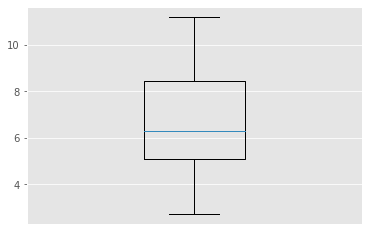

In [13]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(totalcrime_numbers, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a8c9909790>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8c9909e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a8c9909430>],
 'medians': [<matplotlib.lines.Line2D at 0x1a8c9915550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a8c99158b0>],
 'means': []}

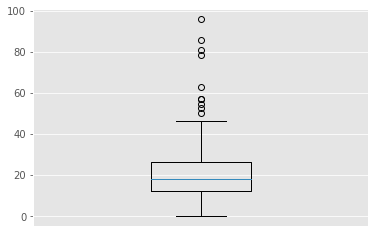

In [14]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(urban_share_of_population, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a8c996eb80>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8c997a280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a8c996e820>],
 'medians': [<matplotlib.lines.Line2D at 0x1a8c997a940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a8c997aca0>],
 'means': []}

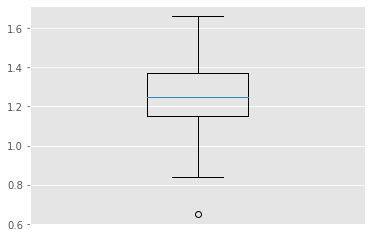

In [15]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(householdmembers_room, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a8c99d2ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8c99dd1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a8c99d2760>],
 'medians': [<matplotlib.lines.Line2D at 0x1a8c99dd8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a8c99ddc10>],
 'means': []}

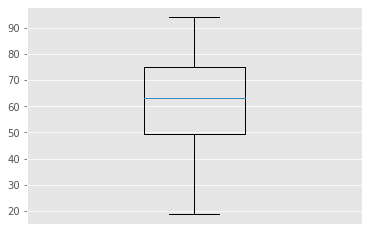

In [16]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(youth_literacy, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a8c9a3c6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8c9a3cd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a8c9a3c340>],
 'medians': [<matplotlib.lines.Line2D at 0x1a8c9a48490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a8c9a487f0>],
 'means': []}

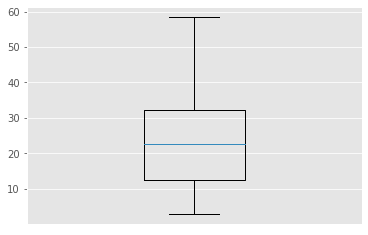

In [17]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(child_labor, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a8c9a9f1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8c9a9f880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a8c9a90e20>],
 'medians': [<matplotlib.lines.Line2D at 0x1a8c9a9ff40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a8c9aab2e0>],
 'means': []}

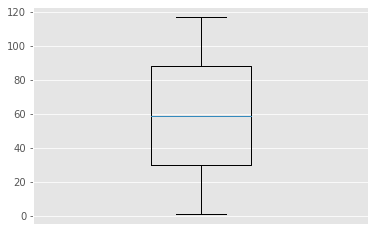

In [18]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(poverty_rank, manage_ticks=(False))

## Before Regression

**Correlation Matrix between independent variables**

This matrix shows the correlation between predictor variables

Text(0.5, 1.0, 'Correlation Matrix')

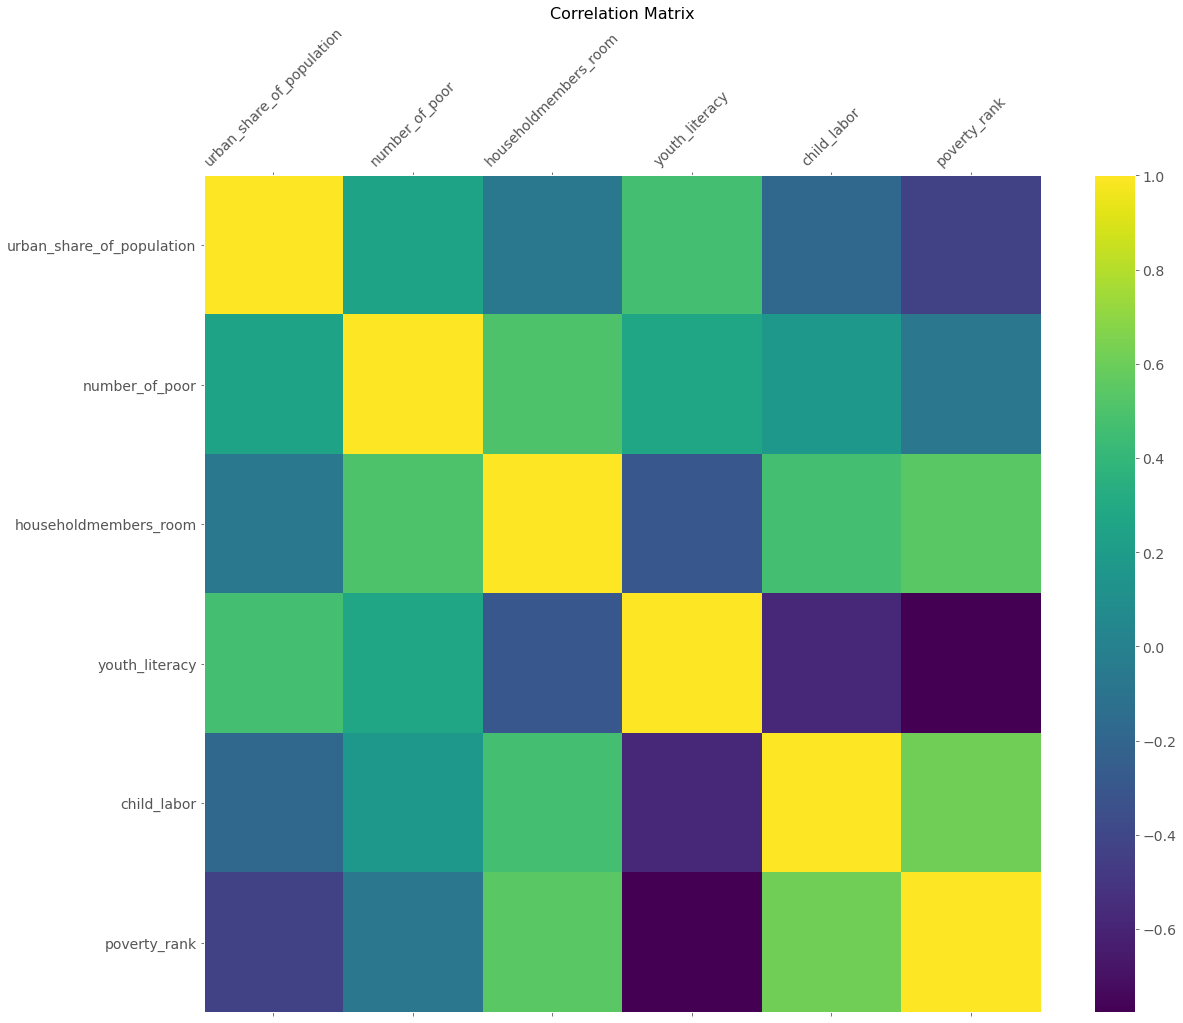

In [19]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(gcd_independent.corr(), fignum=f.number)
plt.xticks(range(gcd_independent.shape[1]), gcd_independent.columns, fontsize=14, rotation=45)
plt.yticks(range(gcd_independent.shape[1]), gcd_independent.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

**Using VIF to deal with multicollinearity**

Calculating VIF and dropping specific dataset if it is bigger than threshold(5)

In [20]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            print('No columns dropped because VIF values are below threshold')
            break

    return df

In [21]:
gcd_predictors_selected_VIF = drop_column_using_vif_(gcd_independent)
print("The columns remaining after VIF selection are:")
print(gcd_predictors_selected_VIF.columns)

No columns dropped because VIF values are below threshold
The columns remaining after VIF selection are:
Index(['urban_share_of_population', 'number_of_poor', 'householdmembers_room',
       'youth_literacy', 'child_labor', 'poverty_rank'],
      dtype='object')


After VIF Method: 

Text(0.5, 1.0, 'Correlation Matrix')

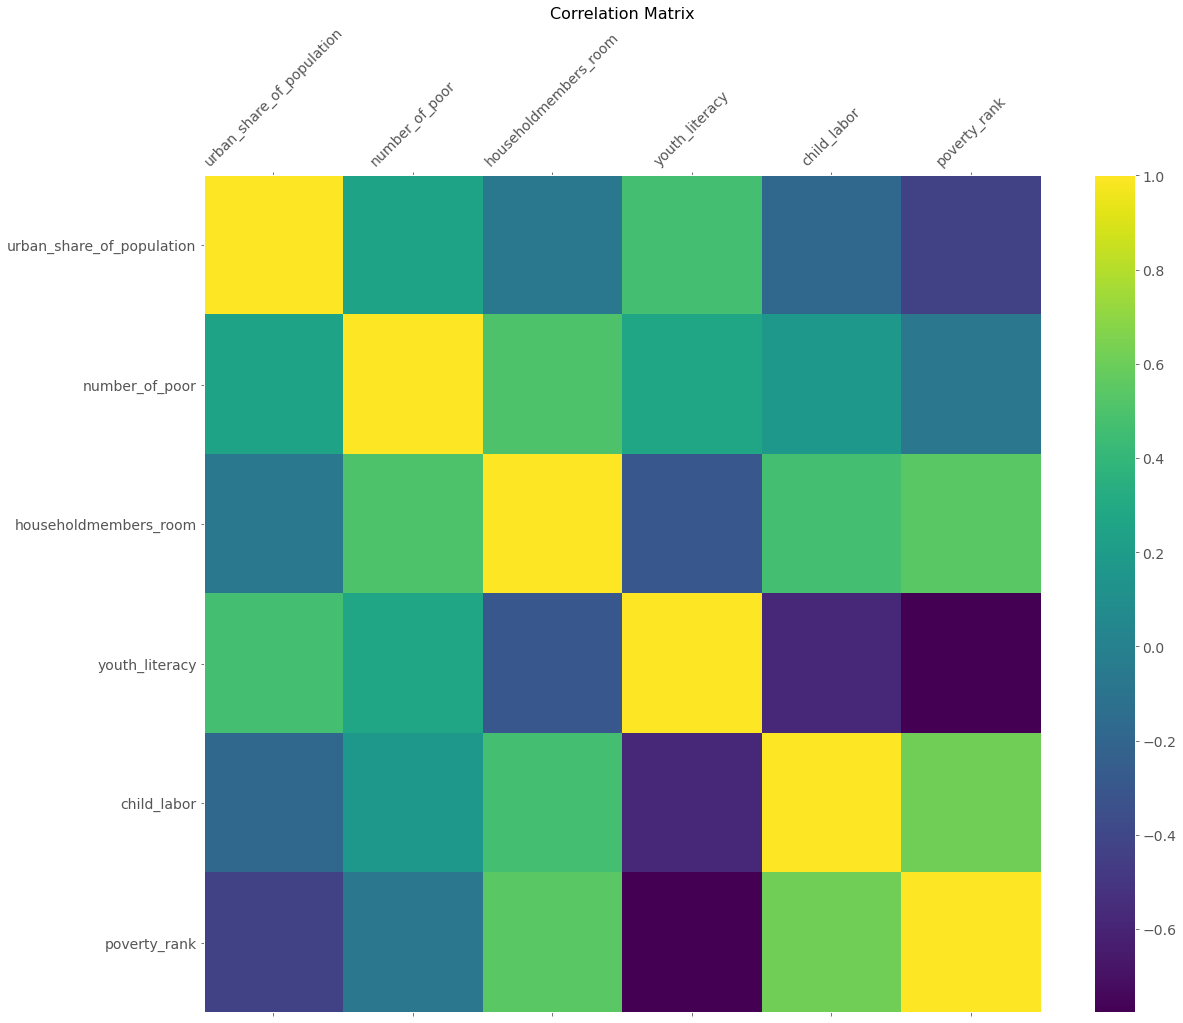

In [22]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(gcd_predictors_selected_VIF.corr(), fignum=f.number)
plt.xticks(range(gcd_predictors_selected_VIF.shape[1]), gcd_predictors_selected_VIF.columns, fontsize=14, rotation=45)
plt.yticks(range(gcd_predictors_selected_VIF.shape[1]), gcd_predictors_selected_VIF.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

## Multiple Regression

In [23]:
X_values = sm.add_constant(gcd_predictors_selected_VIF)
y_values = gcd_dependent

In [24]:
regression_model_a = sm.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:     totalcrime_numbers   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     49.27
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           5.83e-29
Time:                        21:45:40   Log-Likelihood:                -166.64
No. Observations:                 117   AIC:                             347.3
Df Residuals:                     110   BIC:                             366.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Fitted vs Residuals Graphs (LINE Condition Check)

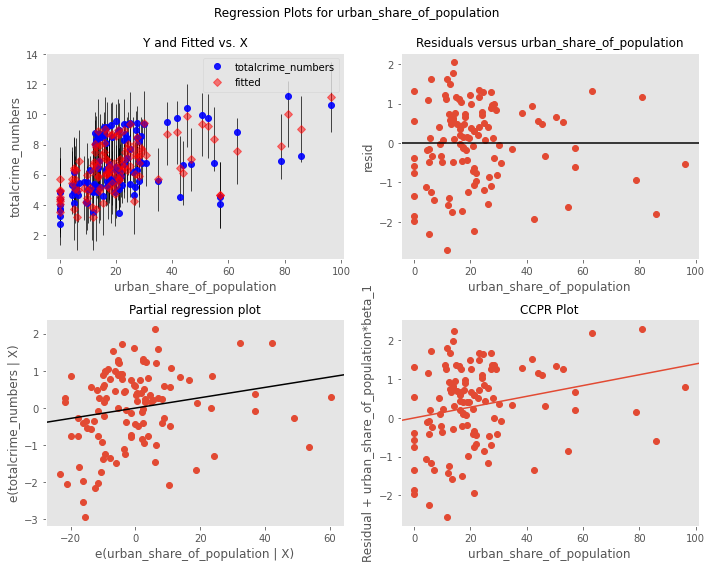

In [25]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'urban_share_of_population',fig=fig)

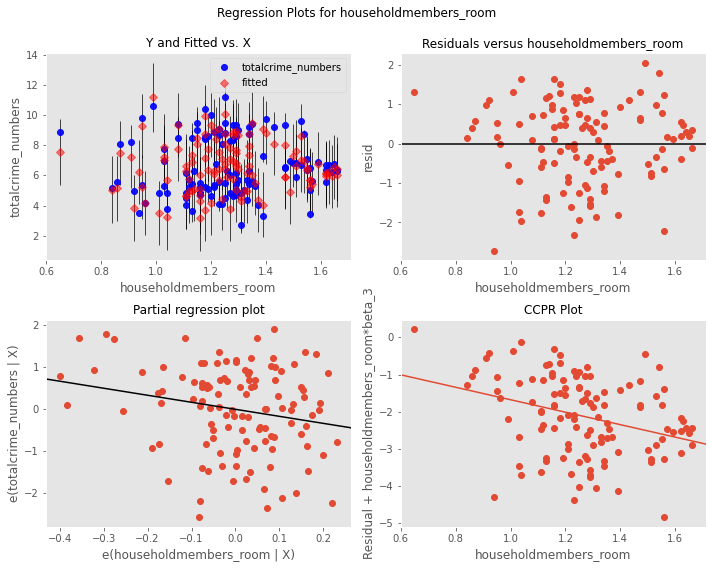

In [26]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'householdmembers_room',fig=fig)

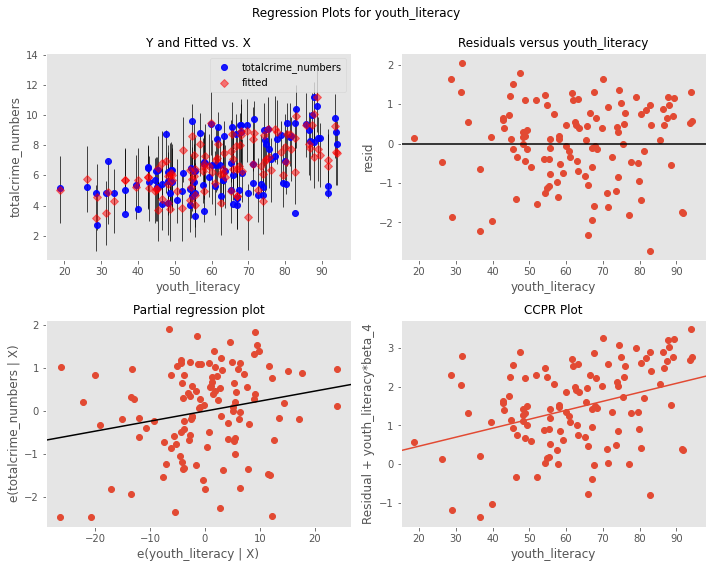

In [27]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'youth_literacy',fig=fig)

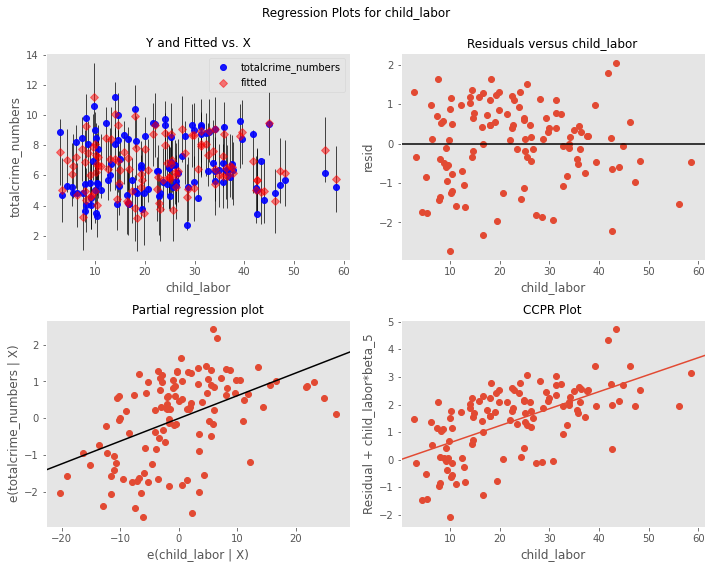

In [28]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'child_labor',fig=fig)

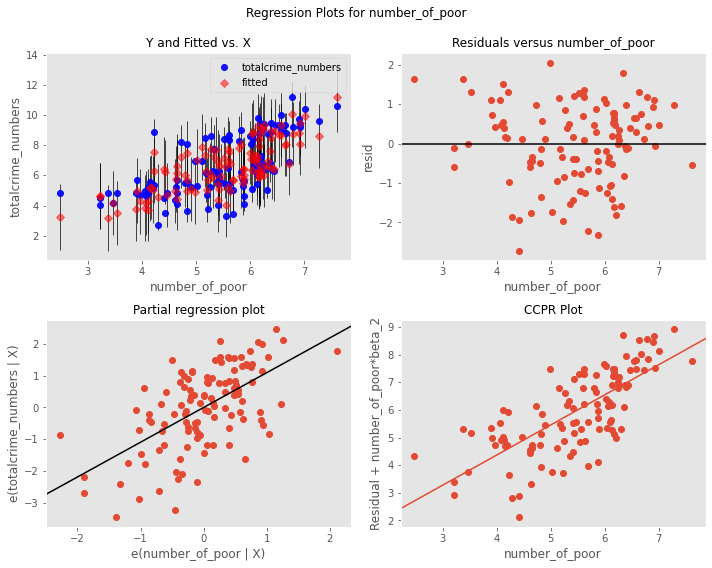

In [29]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'number_of_poor',fig=fig)

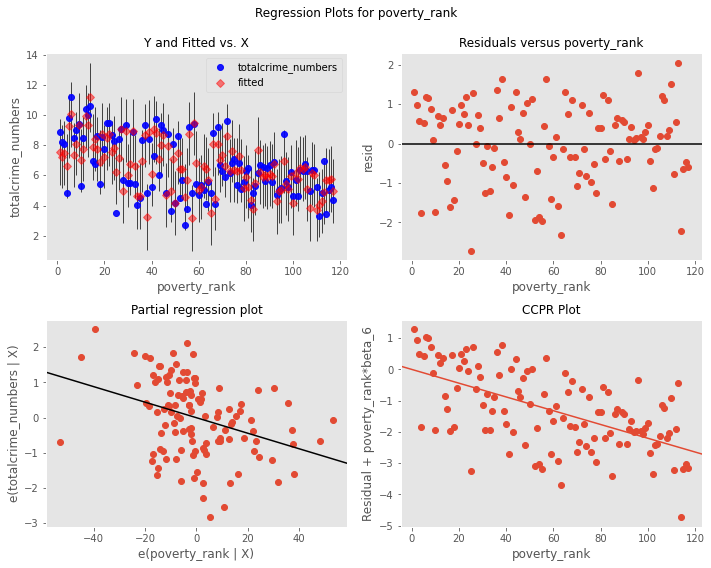

In [30]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'poverty_rank',fig=fig)